In [1]:
#loading the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#importing the dataset

In [4]:
data=pd.read_csv(r"C:\Users\DERIC JOSE\Downloads\Wine_clust.csv")

In [5]:
#analysing the data

In [6]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
data.shape

(178, 13)

In [8]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [10]:
#checking for missing values

In [11]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [12]:
data.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

In [13]:
#doing standard

## kMeans Clustering

In [14]:
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


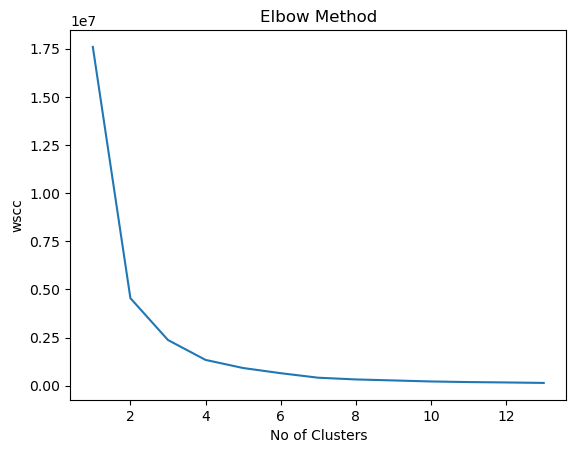

In [16]:
wscc=[]
for i in range(1,14):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wscc.append(kmeans.inertia_)
plt.plot(range(1,14),wscc)
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('wscc')
plt.show()

In [17]:
# according to elbow method, optimum number of cluster = 4

In [18]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data)

In [19]:
y_kmeans

array([1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 2, 2,
       1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 2])

In [20]:
# finding out the silhoutte score to find the effectiveness of kmeans clustering

In [21]:
from sklearn.metrics import silhouette_score

In [23]:
sil_avg=silhouette_score(data,y_kmeans)
print(sil_avg)

0.5572288268257268


## Agglomerative Clustering

In [24]:
#dendrogram to find the optimum number of clustering for Agglomerative Clustering

In [25]:
import scipy.cluster.hierarchy as sch

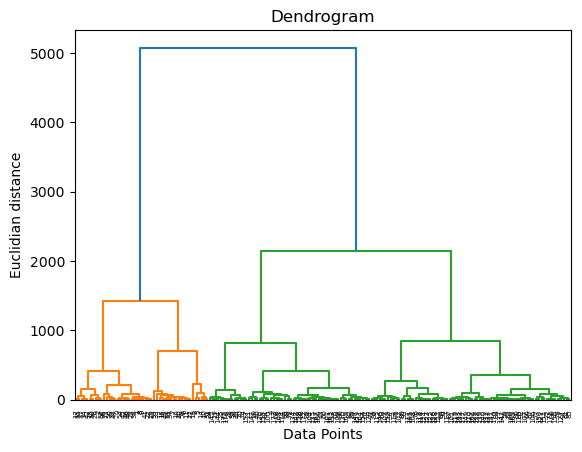

In [27]:
dendrogram = sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidian distance')
plt.show()

In [28]:
#from the dendrogram, the optimum number of clusters is 2
#doing Agglomerative Clustering

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(data)

In [31]:
#checking the silhouette score

In [32]:
sil_avg2 = silhouette_score(data,y_hc)
print(sil_avg2)

0.6587292996216912


## DBSCAN Clustering

In [33]:
from sklearn.neighbors import NearestNeighbors

In [34]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

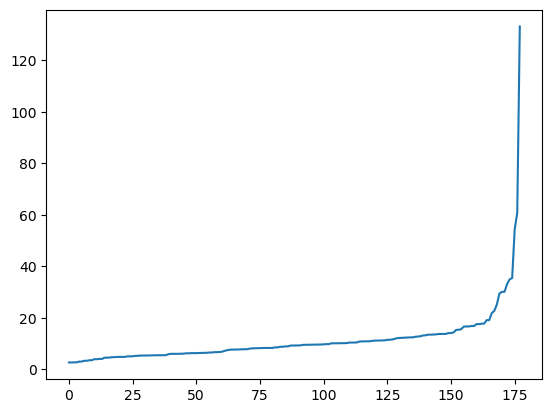

In [35]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [36]:
# the optimum value of epsilon is found at the maximum point of curvature ie = 20

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
dbscan = DBSCAN(eps=20,min_samples=4)

In [39]:
model = dbscan.fit(data)
labels=model.labels_

In [40]:
labels

array([ 0,  0, -1, -1,  3, -1,  1,  1,  0,  0, -1,  1, -1, -1, -1,  1,  1,
       -1, -1,  2, -1, -1,  0,  0,  2,  2, -1,  1, -1,  0,  1, -1, -1, -1,
        0, -1,  2,  0,  0, -1, -1,  0,  0,  3,  2,  0,  0, -1,  0,  1, -1,
        1, -1, -1,  0, -1, -1,  1,  1,  4,  3,  4,  3,  4,  5,  3,  4,  4,
        3, -1,  2,  4,  4, -1,  2,  4,  4,  4, -1,  4, -1,  3,  3,  4,  4,
        4,  4,  3,  3,  3,  4,  4,  4, -1,  5, -1, -1,  4,  3,  4,  3,  3,
        4,  4,  3,  5,  4,  4,  5,  3,  3,  5,  3,  4,  4,  4,  4,  5,  4,
        3,  3,  4,  5,  4,  4,  4,  5,  4,  5,  3,  3,  4,  3,  3,  3,  3,
        3,  4,  3,  3,  3, -1,  4,  3,  2,  2,  4,  3,  3,  3, -1, -1, -1,
        3,  3,  3,  4,  2,  3,  3,  4,  3,  3,  3,  3,  4,  3,  3,  3,  3,
        4,  4,  3,  3,  3,  2,  2,  3], dtype=int64)

In [41]:
# identifying the core points

In [42]:
sample_cores = np.zeros_like(labels,dtype=bool)
sample_cores[dbscan.core_sample_indices_]=True

In [43]:
# calculating the no of clusters

In [44]:
n_clusters=len(set(labels))- (1 if -1 in labels else 0)

In [45]:
n_clusters

6

In [46]:
sil_avg3=silhouette_score(data,labels)
sil_avg3

0.29540781832049284